In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math 

In [119]:
df = pd.read_csv(r"C:\Users\oussa\OneDrive\Bureau\Netflix.csv")

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [121]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [122]:
df.duplicated().sum()

0

In [123]:
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [124]:
df.dtypes

User ID               int64
Subscription Type    object
Monthly Revenue       int64
Join Date            object
Last Payment Date    object
Country              object
Age                   int64
Gender               object
Device               object
Plan Duration        object
dtype: object

In [125]:
# df['Join Date'] = pd.to_datetime(df['Join Date'] , format='%d-%m-%y')

In [126]:
df.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

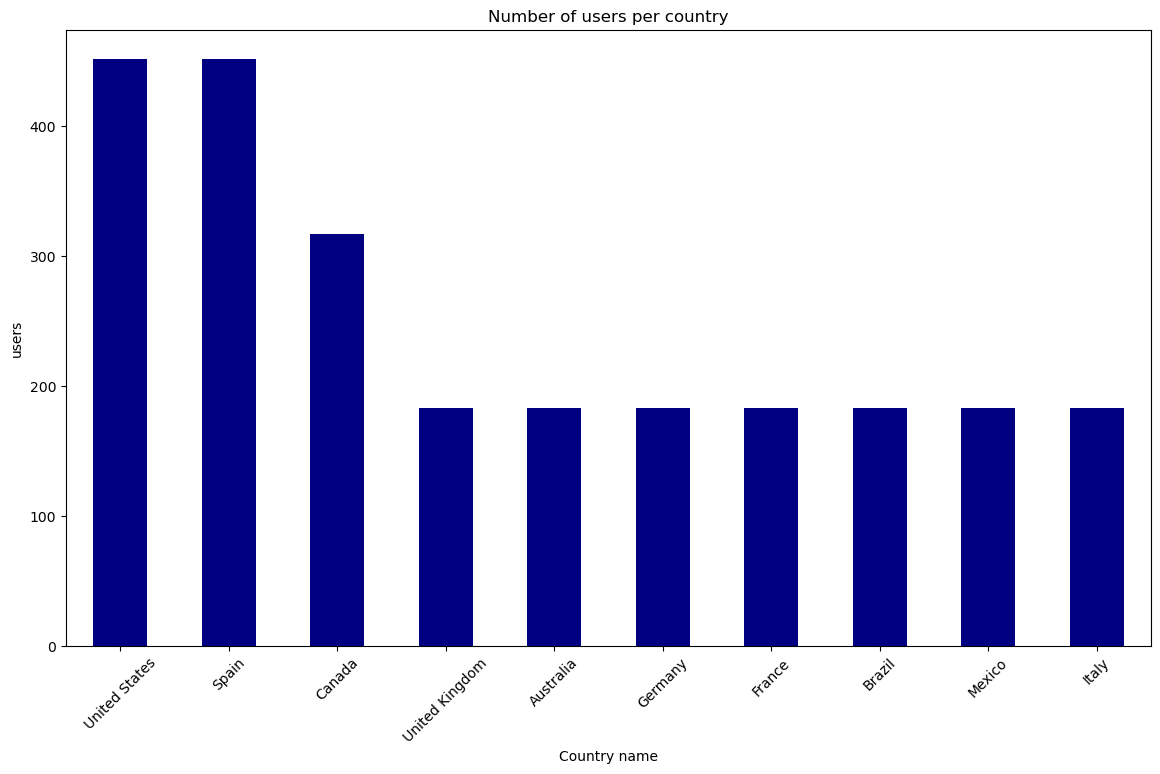

In [127]:
plt.figure(figsize=(14,8))
Sumusers = df['Country'].value_counts().plot(kind='bar',color='navy')
plt.title('Number of users per country')
plt.ylabel('users')
plt.xlabel('Country name')
plt.xticks(rotation=45)
plt.show

In [128]:
usa = df.pivot_table(index='Country', values='User ID', aggfunc='count').sort_values(ascending=False, by='User ID')
usa

,User ID
Country,
Spain,451
United States,451
Canada,317
Australia,183
Brazil,183
France,183
Germany,183
Italy,183
Mexico,183


United states and spain has the biggest number of users with 451 users (this data is not real it's just a demo)

In [129]:
columns_titles = {
    
    'Gender' : 'Gender Counts',
    'Device' : 'Device Counts',
    'Subscription Type' : 'Subscription Type Counts'
}

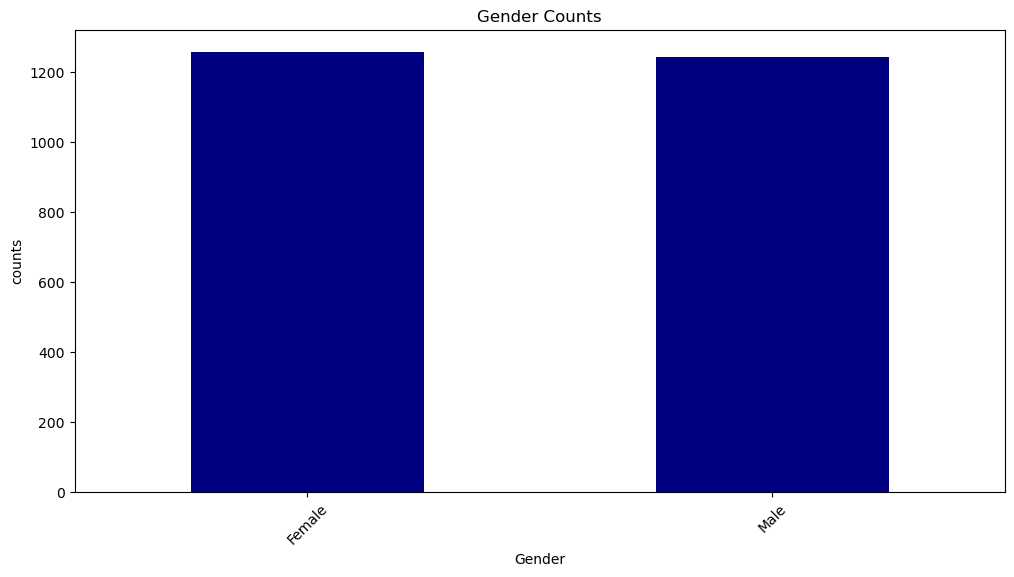

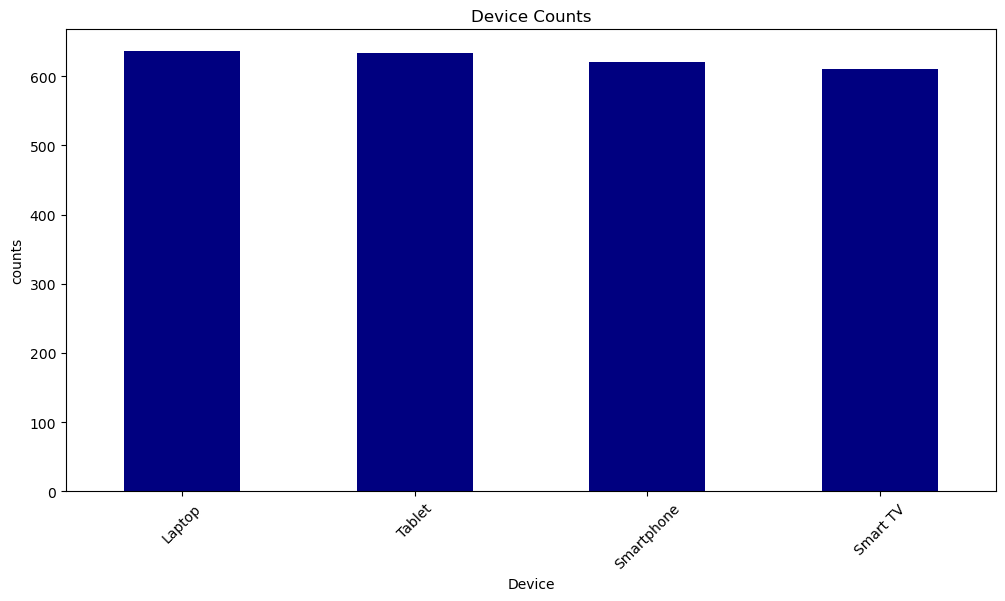

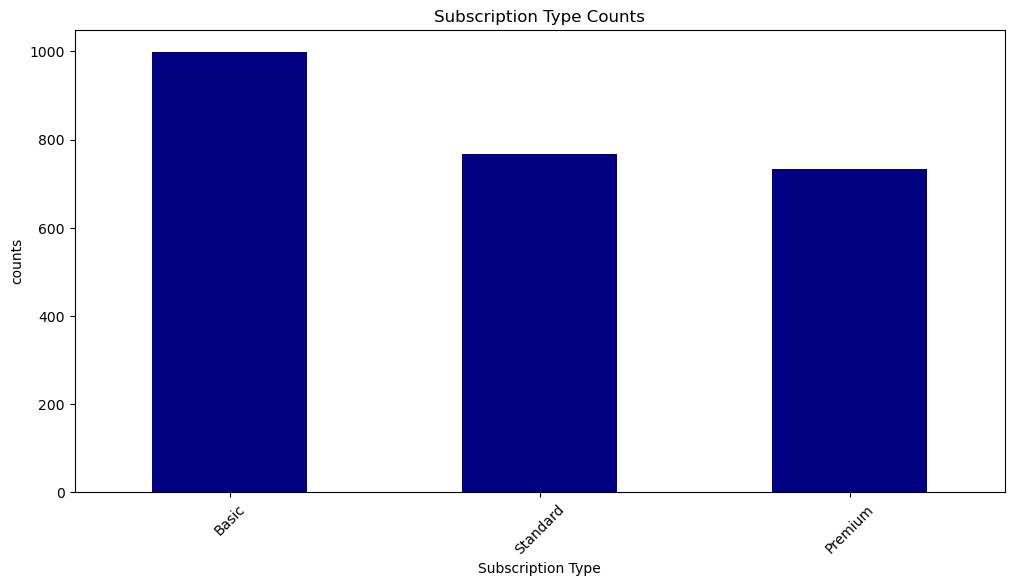

In [130]:
for column, title in columns_titles.items():
    plt.figure(figsize=(12,6))
    df[column].value_counts().plot(kind='bar',color='navy')
    plt.title(title)
    plt.ylabel('counts')
    plt.xlabel(column)
    plt.xticks(rotation=45)
    plt.show

In [131]:
user_counts_by_country = df['Country'].value_counts().reset_index()
user_counts_by_country.columns = ['Country' , 'User counts']
import plotly.express as px

In [132]:
user_counts_by_country.columns

Index(['Country', 'User counts'], dtype='object')

In [133]:
fig = px.choropleth(user_counts_by_country,
               locations='Country',
               locationmode='country names',
               color='User counts',
               hover_name='Country' , 
               title = 'user counts per country',
               color_continuous_scale=px.colors.sequential.Plasma
            )
fig.update_layout(
width=1000, # Adjust the width
height=700, # Adjust the height
title_font_size=24,
geo=dict(
showframe=False,
showcoastlines=False,

)

)

fig.show()

In [134]:
df.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

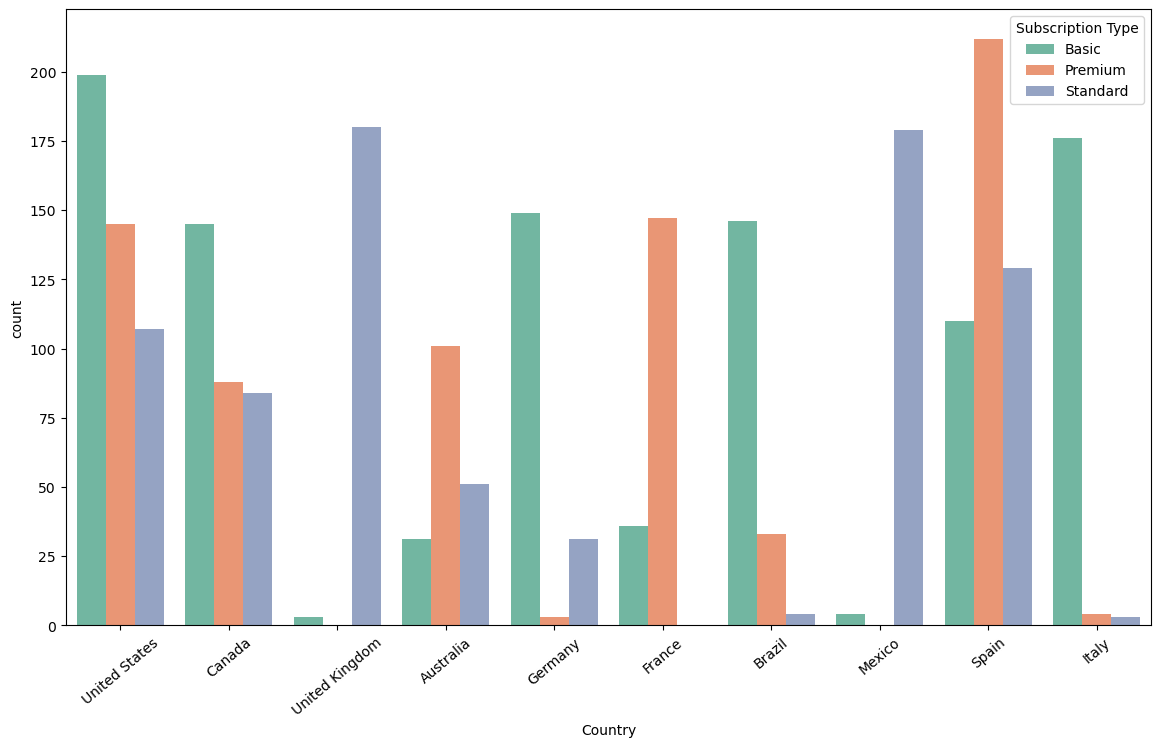

In [135]:
plt.figure(figsize=(14,8))
sns.countplot(x='Country',hue='Subscription Type',data=df,palette='Set2')
plt.title('')
plt.xticks(rotation=40)
plt.show

In [136]:
df.columns
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [137]:
sub_by_country = df.pivot_table(index ='Country' ,columns='Subscription Type',values='User ID',aggfunc='count',fill_value=0)
sub_by_country

Subscription Type,Basic,Premium,Standard
Country,,,
Australia,31,101,51
Brazil,146,33,4
Canada,145,88,84
France,36,147,0
Germany,149,3,31
Italy,176,4,3
Mexico,4,0,179
Spain,110,212,129
United Kingdom,3,0,180


In [138]:
sub_by_country['Total'] = sub_by_country.sum(axis=1)
sub_by_country['Total'].sort_values(ascending=False)

Country
Spain             451
United States     451
Canada            317
Australia         183
Brazil            183
France            183
Germany           183
Italy             183
Mexico            183
United Kingdom    183
Name: Total, dtype: int64

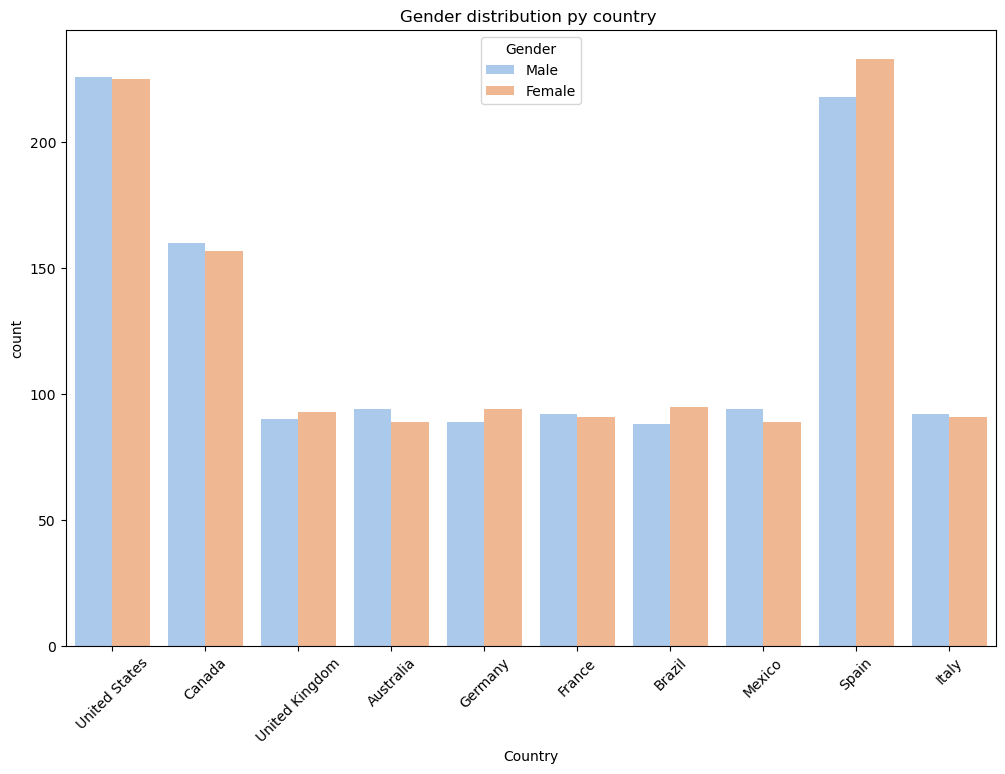

In [139]:
plt.figure(figsize=(12,8))
sns.countplot(x='Country',hue='Gender',data=df,palette='pastel')
plt.title('Gender distribution py country ')
plt.xticks(rotation=45)
plt.show()

In [140]:
Gender_by_country = df.pivot_table(index='Country',columns='Gender',values="User ID",aggfunc='count')
Gender_by_country

Gender,Female,Male
Country,,
Australia,89,94
Brazil,95,88
Canada,157,160
France,91,92
Germany,94,89
Italy,91,92
Mexico,89,94
Spain,233,218
United Kingdom,93,90


In [169]:
Gender_by_country['Total'] = Gender_by_country.sum(axis=1)
Gender_by_country

Gender,Female,Male,Total
Country,,,
Australia,89,94,183.0
Brazil,95,88,183.0
Canada,157,160,317.0
France,91,92,183.0
Germany,94,89,183.0
Italy,91,92,183.0
Mexico,89,94,183.0
Spain,233,218,451.0
United Kingdom,93,90,183.0


In [142]:
df.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [143]:
Sub_by_country_gender = df.pivot_table(index='Country', columns=['Subscription Type' , 'Gender'] , values='User ID',aggfunc='count')


In [144]:
Sub_by_country_gender

Subscription Type  Basic       Premium       Standard      
Gender            Female  Male  Female  Male   Female  Male
Country                                                    
Australia           16.0  15.0    45.0  56.0     28.0  23.0
Brazil              78.0  68.0    16.0  17.0      1.0   3.0
Canada              68.0  77.0    40.0  48.0     49.0  35.0
France              17.0  19.0    74.0  73.0      NaN   NaN
Germany             80.0  69.0     1.0   2.0     13.0  18.0
Italy               86.0  90.0     3.0   1.0      2.0   1.0
Mexico               2.0   2.0     NaN   NaN     87.0  92.0
Spain               60.0  50.0   113.0  99.0     60.0  69.0
United Kingdom       2.0   1.0     NaN   NaN     91.0  89.0
United States      103.0  96.0    72.0  73.0     50.0  57.0

In [145]:
Sub_by_country_gender2 = df.pivot_table(index=['Country', 'Gender'], columns=['Subscription Type'] , values='User ID',aggfunc='count')
Sub_by_country_gender2

Subscription Type      Basic  Premium  Standard
Country        Gender                          
Australia      Female   16.0     45.0      28.0
               Male     15.0     56.0      23.0
Brazil         Female   78.0     16.0       1.0
               Male     68.0     17.0       3.0
Canada         Female   68.0     40.0      49.0
               Male     77.0     48.0      35.0
France         Female   17.0     74.0       NaN
               Male     19.0     73.0       NaN
Germany        Female   80.0      1.0      13.0
               Male     69.0      2.0      18.0
Italy          Female   86.0      3.0       2.0
               Male     90.0      1.0       1.0
Mexico         Female    2.0      NaN      87.0
               Male      2.0      NaN      92.0
Spain          Female   60.0    113.0      60.0
               Male     50.0     99.0      69.0
United Kingdom Female    2.0      NaN      91.0
               Male      1.0      NaN      89.0
United States  Female  103.0     72.0      50.0
               Male     96.0     73.0      57.0

In [146]:
df.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [147]:
age_counts = df.pivot_table(index='Age' , values = 'User ID' , aggfunc='count',fill_value=0)

In [148]:
age = age_counts.sort_values(by='User ID',ascending=False)

<Axes: xlabel='Age'>

<Figure size 2000x1400 with 0 Axes>

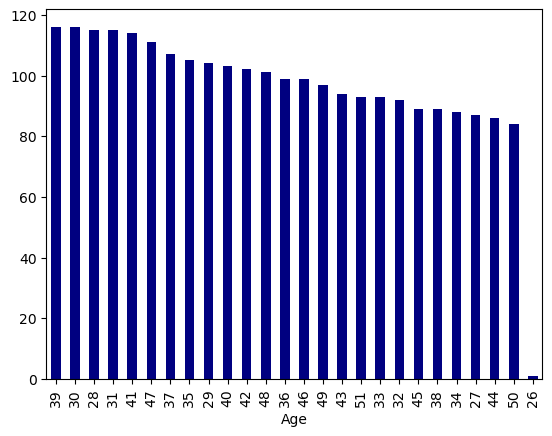

In [149]:
plt.figure(figsize=(20,14))
age.plot(legend=False , kind='bar',color='navy')

In [150]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [151]:
df['Join Date'] = pd.to_datetime(df['Join Date'], format='%d-%m-%y')

In [152]:
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'], format='%d-%m-%y')

In [153]:
df['Duration'] = (df['Last Payment Date'] - df['Join Date']).dt.days

In [154]:
df['Duration month'] = df['Duration'].apply(lambda x: math.ceil(x/30))

In [155]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duration,Duration month
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511,18
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655,22
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,4
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351,12
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58,2


In [156]:
table = df.pivot_table(index='Country',columns='Subscription Type', values='Duration month' , aggfunc='sum',fill_value=0)
table

Subscription Type,Basic,Premium,Standard
Country,,,
Australia,343,1094,581
Brazil,1598,355,53
Canada,1599,961,898
France,402,1657,0
Germany,1607,31,334
Italy,1785,41,30
Mexico,33,0,1952
Spain,1177,2218,1333
United Kingdom,35,0,2016


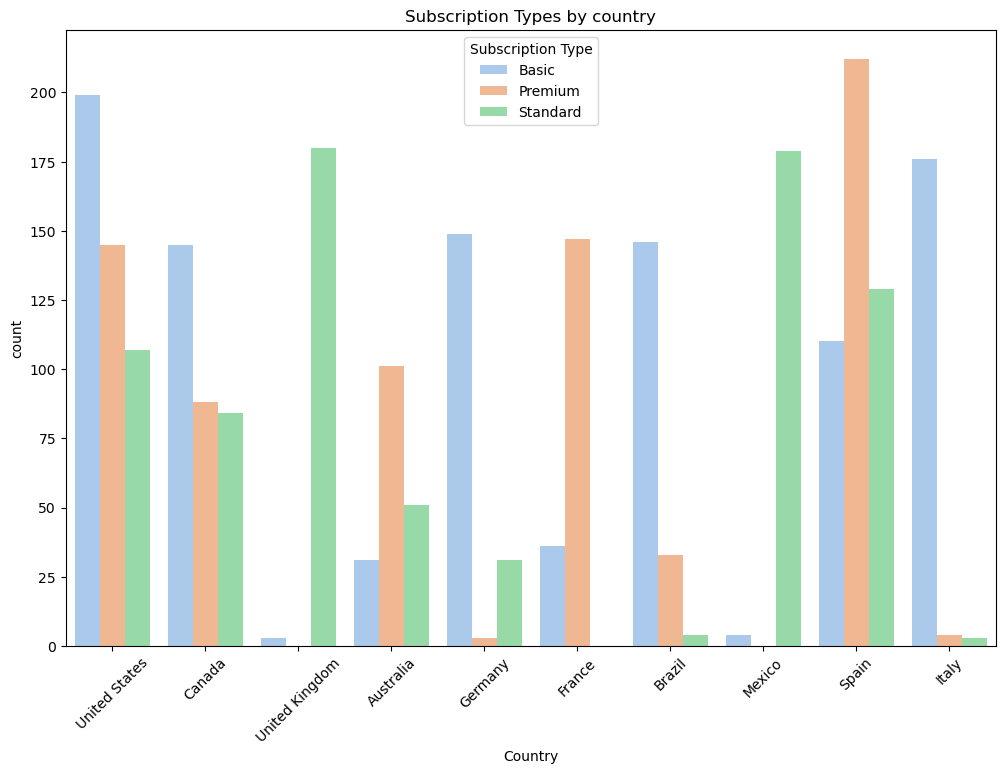

In [157]:
plt.figure(figsize=(12,8))
sns.countplot(x='Country',hue='Subscription Type',data=df,palette='pastel')
plt.title('Subscription Types by country')
plt.xticks(rotation=45)
plt.show()

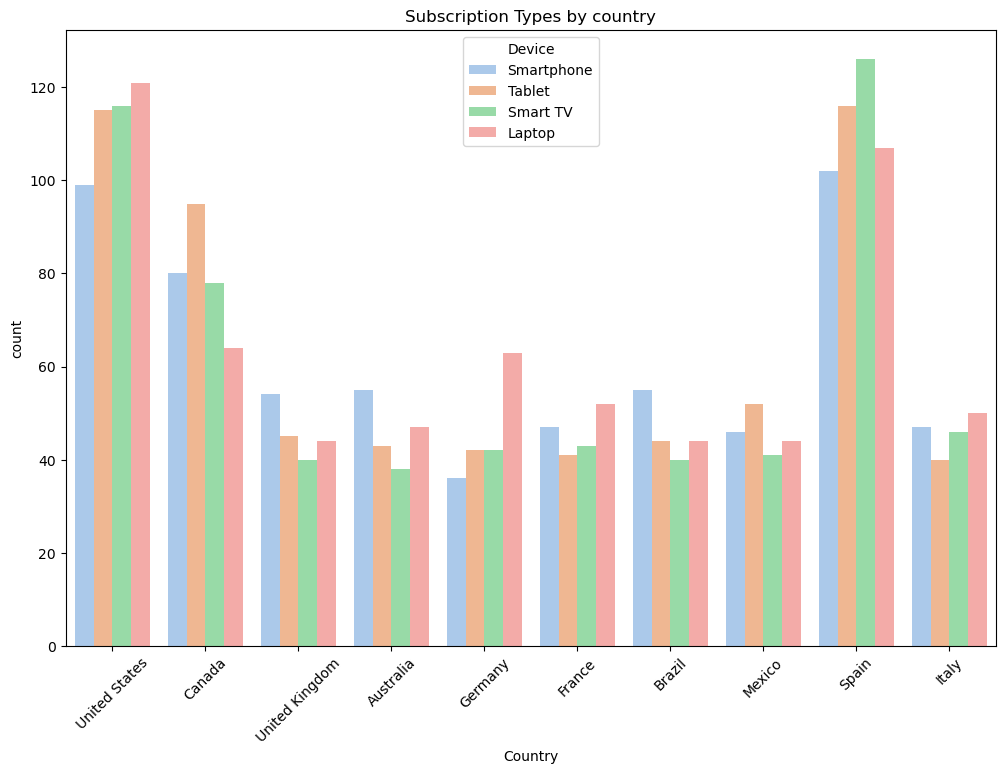

In [158]:
plt.figure(figsize=(12,8))
sns.countplot(x='Country',hue='Device',data=df,palette='pastel')
plt.title('Subscription Types by country')
plt.xticks(rotation=45)
plt.show()

In [159]:
average_sub = df['Duration month'].mean()

In [160]:
print(f"Average Duration: {average_sub}")

Average Duration: 10.7808


In [161]:
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duration,Duration month
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511,18
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655,22
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,4
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351,12
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-07-12,Spain,28,Female,Smart TV,1 Month,352,12
2496,2497,Basic,15,2022-08-04,2023-07-14,Spain,33,Female,Smart TV,1 Month,344,12
2497,2498,Standard,12,2022-08-09,2023-07-15,United States,38,Male,Laptop,1 Month,340,12
2498,2499,Standard,13,2022-08-12,2023-07-12,Canada,48,Female,Tablet,1 Month,334,12


In [162]:
df['LTV'] = df['Monthly Revenue'] * df['Duration month']
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duration,Duration month,LTV
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,511,18,180
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,655,22,330
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,4,48
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,351,12,144
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,58,2,20


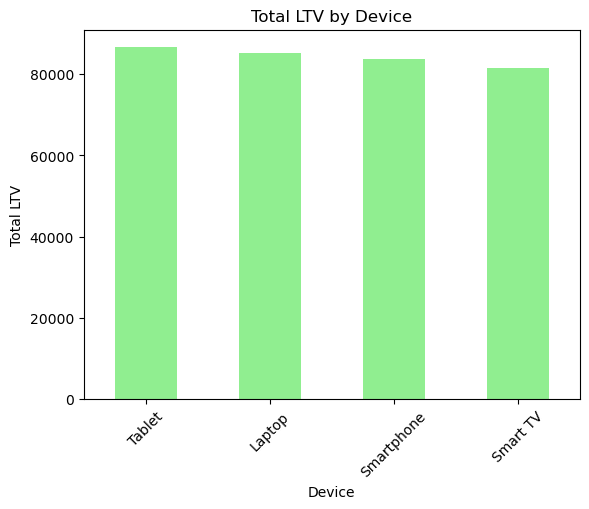

In [163]:
Total_Revenue_per_Device = df.groupby('Device')['LTV'].sum().sort_values(ascending=False)
Total_Revenue_per_Device.plot(kind='bar', color='lightgreen')
plt.title("Total LTV by Device")
plt.ylabel("Total LTV")
plt.xlabel("Device")
plt.xticks(rotation=45)
plt.show()

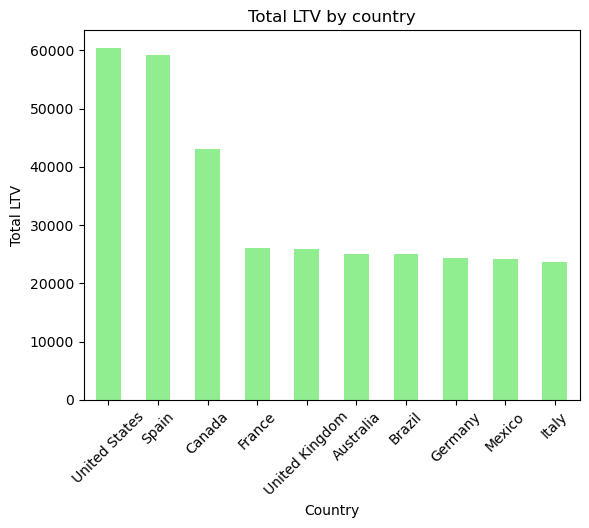

In [164]:
Total_Revenue_per_Country = df.groupby('Country')['LTV'].sum().sort_values(ascending=False)
Total_Revenue_per_Country.plot(kind='bar', color='lightgreen')
plt.title("Total LTV by country")
plt.ylabel("Total LTV")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()

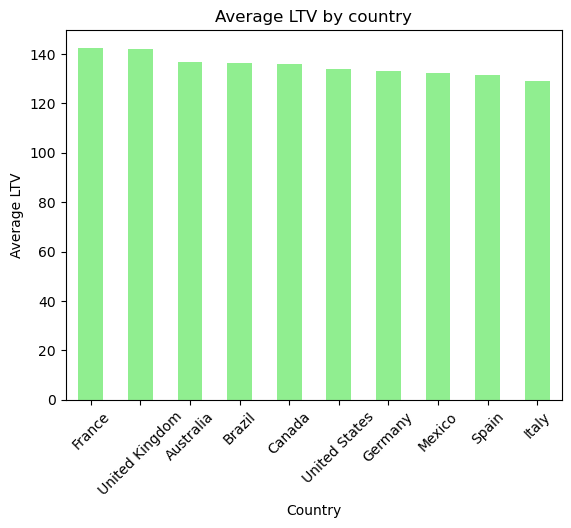

In [165]:
Average_revenue = df.groupby('Country')['LTV'].mean().sort_values(ascending=False)
Average_revenue.plot(kind='bar',color='lightgreen')
plt.title("Average LTV by country")
plt.ylabel("Average LTV")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

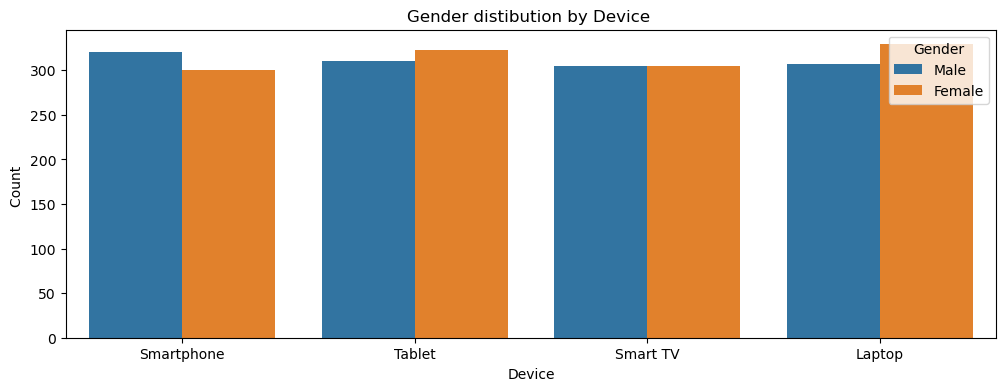

In [166]:
plt.figure(figsize=(12,4))
sns.countplot(x='Device', hue='Gender', data=df)
plt.title("Gender distibution by Device ")
plt.xlabel("Device")
plt.ylabel("Count ")
plt.show